In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Added all Libraries
from spectral import *
import numpy as np
import PIL
import matplotlib
import matplotlib.pyplot as plt
import mpmath as mp

Reading Hyperspectral Image. For this example Hawaii

In [3]:
#image stored in arr
img = open_image('f090819t01p00r06rdn_b_sc01_ort_img.hdr')
print img
arr = img.load()
block = []
for i in range(224):
    data = arr[2500:2510,450:460,i].astype(np.float32)
    block.append(data)
print "process complete"
varblock = []
for hg in range(224):
    yog = np.var(block[hg])
    varblock.append(yog)
variance = np.average(varblock)
##### considering 40x40 matrix
block = []
for i in range(224):
    data = arr[2500:2540,450:490,i].astype(np.float32)
    block.append(data)
print "process complete"

	Data Source:   '././f090819t01p00r06rdn_b_sc01_ort_img'
	# Rows:           6955
	# Samples:         781
	# Bands:           224
	Interleave:        BIP
	Quantization:  16 bits
	Data format:     int16
process complete
process complete


In [4]:
#correlation
corr = []
for i in range(223):
    cor = np.corrcoef(block[i].reshape(-1), block[i+1].reshape(-1))[0][1]
    corr.append(cor)
print "process complete"

process complete


In [5]:
#Pre-Processing of the hyperspectral image, Hawaii. Using GOA technique
haha = corr.index(min(corr))
print haha

157


In [6]:
#greedy ordering algorithm
rblock = [] #reference block
block1 = [] #all blocks
block1 = block
rindex = [] #contains all index
ifin = []
ifin1 = []


rindex.append(haha)
rblock.append(block1[haha])

for gh in range(len(block)):
        ifin.append(gh) #ifin will conatin the number od indices
        
for jk in range(224): 
    corgoa = [] #conatins correlation of greedy ordering algorithm
    Ref = rindex[jk] #Ref will contain the last rindex    
    block1.pop(Ref) #Removes that index from the block
    yoyo = ifin.pop(Ref) # saves it to a temp variable yoyo
    ifin1.append(yoyo) #ifin1 will conatin the final rearranged indexes
    for ijk in range(len(block1)):
        corr2 = np.corrcoef(rblock[jk].reshape(-1), block1[ijk].reshape(-1))[0][1] #calculate correlation coefficient with respect to the reference block
        corgoa.append(corr2)
    if len(corgoa) !=0:
        indexi = corgoa.index(max(corgoa)) #indexi will contain the index of maximum correlation w.r.t to the rblock
        rblock.append(block1[indexi]) #add the corresponding block to the rblock
        rindex.append(indexi) 
    del(corgoa)
    del(Ref)
print "Process Complete"

Process Complete


In [7]:
corrfin = []
for i in range(223):
    corfin = np.corrcoef(rblock[i].reshape(-1), rblock[i+1].reshape(-1))[0][1]
    corrfin.append(corfin)
print "process complete"

process complete


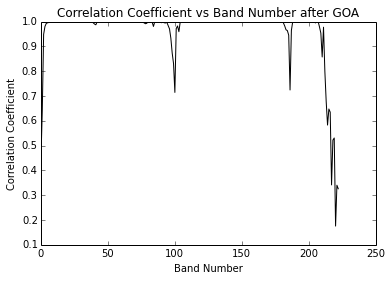

In [8]:
plt.figure(12)
plt.plot(range(0,223),corrfin, 'k')
plt.xlabel('Band Number')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficient vs Band Number after GOA')
plt.show()

In [9]:
#normalizing each block
rblockn = []
maxblock = []
minblock = []
for q in range(len(rblock)):
    xc = rblock[q]
    maxxc = np.max(xc)
    maxblock.append(maxxc)
    minxc = np.min(xc)
    minblock.append(minxc)
    xcfin = []
    for xci in range(len(xc)):
        for xcj in range(len(xc)):
            xcres = (xc[xci][xcj] - minxc)/(maxxc - minxc) 
            xcfin.append(xcres)
    xcfin1 = np.reshape(xcfin,(40,-1))
    rblockn.append(xcfin1)
print 'Process Complete'

Process Complete


In [10]:
def raster(arr):
    a = arr
    xx = []
    for i in range(10):
        zz = []
        for j in range(10):
            x = float(a[i][j])
            zz.append(x)
        xx.extend(zz)
        del zz
    return xx

In [11]:
#imagescanning
finlist = []
for i in range(224):
    rblockyo = rblockn[i]
    xx = rblockyo[:10,:10]
    yy = raster(xx)
    finlist = finlist + yy

In [12]:
len(finlist)

22400

In [13]:
finlist = list(finlist)

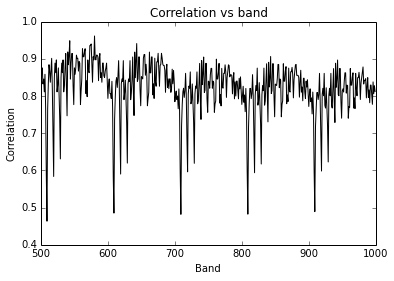

In [14]:
plt.figure(29)
plt.plot(range(500,1000),finlist[500:1000], 'k')
plt.xlabel('Band')
plt.ylabel('Correlation')
plt.title('Correlation vs band')
plt.show()

In [15]:
from audiolazy import lpc

In [16]:
y = 10 #frame size

In [17]:
finli = map (lambda x: finlist[y*x:(x+1)*y], range (len(finlist)/y)) 

In [18]:
reslpcfin = []
errorframe = []
coefficient = []
lpcfunction = []
lpcerror = []
errorfull = []
for ijk in range(len(finlist)/y):
    lpcframe = lpc(finli[ijk],order=3)
    lpcfunction.append(lpcframe)
    lpcerror.append(lpcframe.error)
    reslpc = list(lpcframe(finli[ijk]))
    reslpcfin.append(reslpc)
    coefficient.append(lpcframe.numerator)
    errorfr = []
    for ijkl in range(len(reslpc)):
        err = finli[ijk][ijkl] - reslpc[ijkl]
        errorfr.append(err)
        errorfull.append(err)
    errorframe.append(errorfr)
    del(errorfr)
    del(reslpc)
    del(lpcframe)
print "process complete"

process complete


In [19]:
#lpcjai1 = lpc(finlist, order=3).plot().show()

In [20]:
from sklearn import cluster

In [21]:
abcd = np.array(errorframe)

In [22]:
K_means = cluster.KMeans(n_clusters=256,max_iter=1,n_init =1, init='k-means++',tol = '1e-5')

In [23]:
fincodebook1 = K_means.fit(abcd)

In [24]:
codebook = K_means.cluster_centers_.squeeze()
huffcodebook = list(K_means.labels_)

In [25]:
dist = K_means.inertia_
print dist

3.23834201233


In [26]:
#print codebook
#print huffcodebook

In [27]:
from heapq import heappush, heappop, heapify
from collections import defaultdict
 
def encode(symb2freq):
    """Huffman encode the given dict mapping symbols to weights"""
    heap = [[wt, [sym, ""]] for sym, wt in symb2freq.items()]
    heapify(heap)
    while len(heap) > 1:
        lo = heappop(heap)
        hi = heappop(heap)
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])
    return sorted(heappop(heap)[1:], key=lambda p: (len(p[-1]), p))
 
txt = "this is an example for huffman encoding"
symb2freq = defaultdict(int)
for ch in huffcodebook:
    symb2freq[ch] += 1
# in Python 3.1+:
# symb2freq = collections.Counter(txt)
huff = encode(symb2freq)
print "Symbol\tWeight\tHuffman Code"
huffsymbol = []
hufffreq = []
for p in huff:
    huffsymbol.append(p[1])
    hufffreq.append(symb2freq[p[0]])
    #print "%s\t%s\t%s" % (p[0], symb2freq[p[0]], p[1])

Symbol	Weight	Huffman Code


In [28]:
lenhuff = []
for i in range(len(huffsymbol)):
    yo = huffsymbol[i]
    x = str(yo)
    ya = x.lstrip('0')
    lenhuff.append(len(ya)*hufffreq[i])
print sum(lenhuff)

14341


In [29]:
len(lenhuff)

256

In [30]:
cr = float(len(finlist)*16)/sum(lenhuff)
print cr

24.991283732


In [31]:
def huffall(y):
    finli = map (lambda x: finlist[y*x:(x+1)*y], range (len(finlist)/y)) 
    print len(finli)
    global huffcode, lenhuff
    huffcode = []
    lenhuff = []
    for sym in finli:
        frequency = defaultdict(int)
        for symbol in sym:
            frequency[symbol] += 1

        huff = encode(frequency)
        #print "Symbol".ljust(10) + "Weight".ljust(10) + "Huffman Code"
        repeat = frequency.values()

        for i in range(len(huff)):
            p = huff[i]
            j = repeat[i]
            for k in range(j):
                x = str(p[1])
                ya = x.lstrip('0')
                lenyz = len(ya)
                #print  p[0] , str(frequency[p[0]]).ljust(10) , ya
                lenhuff.append(lenyz)
                huffcode.append(p[1])
        del frequency
    print 'process complete'
    print "The length of Huffcode", len(huffcode)
    cr = float(len(finlist)*16)/sum(lenhuff)
    print "The compression ratio for frame size", y, "is", cr

In [32]:
#BPP
bpp = sum(lenhuff)/22400.00
print bpp

0.640223214286


In [33]:
#huffcodebook - vector de-quantization
errordecode = []
for ik in huffcodebook:
    abcde = list(codebook[ik])
    errordecode.append(abcde)

In [34]:
len(errordecode)

2240

In [35]:
print coefficient[0]
print "---"
print lpcerror[0]
print "---"
print lpcfunction[0] #h
print "---"
print finli[0] #x
print "---"
print reslpcfin[0] #y
print "---"
print errordecode[0] #e


[1, -0.9919313231500277, 0.02646257884276082, 0.10381334920150698]
---
0.997774630387
---
1 - 0.991931 * z^-1 + 0.0264626 * z^-2 + 0.103813 * z^-3
---
[0.5555555820465088, 0.8888888955116272, 0.8888888955116272, 1.0, 0.4444444477558136, 0.5555555820465088, 0.6666666865348816, 0.6666666865348816, 0.5555555820465088, 0.5555555820465088]
---
[0.5555555820465088, 0.3378159119288654, 0.021873590644900166, 0.19947963986189002, -0.4316860496026919, 0.23343832507174223, 0.23116819839410271, 0.06621981810753792, -0.030416181033650465, 0.09133321974863047]
---
[0.0, 0.5510729835827618, 0.86701530486672707, 0.80052036013811001, 0.87613049735850557, 0.32211725697476656, 0.43549848814077885, 0.60044686842734363, 0.5859717630801593, 0.46422236229787833]


In [36]:
from scipy.signal import lfilter

In [37]:
estx = []

In [38]:
estx.append(reslpcfin[0][0]+errordecode[0][0])

In [39]:
estx

[0.55555558204650879]

In [40]:
esty = list(lpcfunction[0](estx))

In [41]:
esty

[0.55555558204650879]

In [42]:
len(lpcfunction)

2240

In [43]:
estx = []
esty = []
for iq in range(len(errordecode)):
    estx1 = []
    esty1 = []
    for iw in range(len(errordecode[iq])):
        estx1.append(reslpcfin[iq][iw]+errordecode[iq][iw])
        esty1 = list(lpcfunction[iq](estx1))
    esty.append(esty1)
    estx.append(estx1)

In [44]:
print estx[0]
print finli[0]

[0.55555558204650879, 0.8888888955116272, 0.8888888955116272, 1.0, 0.44444444775581365, 0.55555558204650879, 0.66666668653488159, 0.66666668653488159, 0.55555558204650879, 0.55555558204650879]
[0.5555555820465088, 0.8888888955116272, 0.8888888955116272, 1.0, 0.4444444477558136, 0.5555555820465088, 0.6666666865348816, 0.6666666865348816, 0.5555555820465088, 0.5555555820465088]


In [45]:
print esty[0]
print reslpcfin[0]

[0.55555558204650879, 0.3378159119288654, 0.021873590644900166, 0.19947963986189002, -0.43168604960269191, 0.23343832507174217, 0.23116819839410271, 0.066219818107537937, -0.030416181033650465, 0.09133321974863047]
[0.5555555820465088, 0.3378159119288654, 0.021873590644900166, 0.19947963986189002, -0.4316860496026919, 0.23343832507174223, 0.23116819839410271, 0.06621981810753792, -0.030416181033650465, 0.09133321974863047]


In [46]:
estxfin = []
for yi in estx:
    for yu in yi:
        estxfin.append(yu)

In [47]:
y = 100
estxfin1 = map (lambda x: estxfin[y*x:(x+1)*y], range (len(finlist)/y)) 

In [48]:
blockfin = []
for iji in estxfin1:
    bloc = np.reshape(iji,[10, 10])
    blockfin.append(bloc)

In [49]:
len(maxblock)

224

In [50]:
finblockfin = []
for i in range(len(blockfin)):
    eega = blockfin[i]
    eegamax = np.max(eega)
    eegamin = np.min(eega)
    oldmax = maxblock[i]
    oldmin = minblock[i]
    eegvalue = []
    for j in range(len(eega)):
        for k in range(len(eega)):
            ee = ((eega[j][k] - eegamin)*(oldmax - oldmin))/(eegamax - eegamin)
            eee = ee  + oldmin
            eegvalue.append(eee)
    fblock = np.reshape(eegvalue, [10,10])
    finblockfin.append(fblock)
print "Process Complete"

Process Complete


In [51]:
finblockfin[0]

array([[ 2.85714315,  6.71428579,  6.71428579,  8.        ,  1.5714286 ,
         2.85714315,  4.14285736,  4.14285736,  2.85714315,  2.85714315],
       [ 1.5714286 ,  1.5714286 ,  8.        ,  4.14285736,  4.14285736,
         1.5714286 ,  4.14285736,  2.85714315,  0.28571438,  2.85714315],
       [ 2.85714315,  6.44022446,  1.21040009,  2.95113339,  2.94791817,
         2.81198176,  6.70698199,  2.68540257,  1.16254967,  2.59355529],
       [ 2.85714315,  6.98834712,  1.9324571 ,  2.76315292,  2.76636814,
         2.90230455,  6.72158959,  1.74316918,  0.69459331,  3.12073102],
       [ 5.42857158,  2.85714315,  2.85714315,  1.5714286 ,  2.85714315,
         4.14285736,  1.5714286 ,  1.5714286 ,  0.28571438,  2.85714315],
       [ 5.42857158,  2.85714315,  5.42857158,  0.28571438,  1.5714286 ,
         1.5714286 ,  2.85714315,  8.        ,  6.71428579,  2.85714315],
       [ 1.5714286 ,  1.5714286 ,  5.42857158,  4.14285736,  4.14285736,
         0.28571438,  1.5714286 ,  1.5714286 

In [52]:
rblock5 = []
for i in range(len(rblock)):
    a = rblock[i]
    ab = a[:10,:10]
    rblock5.append(ab)

In [53]:
psnr = []
mse = []
for i in range(224):
    aq = rblock5[i]
    aw = finblockfin[i]
    subtr = []
    for j in range(10):
        for k in range(10):
            sub = (aq[j][k] - aw[j][k])**2
            subtr.append(sub)
    mse1 = np.sum(subtr)/100.0
    mse.append(mse1)
    psnr1 = 10*np.log10(65536**2/mse1)
    psnr.append(psnr1)
print "process complete"

process complete


In [54]:
for i in range(20):
    a = psnr.index(inf)
    psnr[a] = 104

ValueError: inf is not in list

In [55]:
psnr1 = np.sum(psnr)/224.0

In [56]:
sdr = 10*np.log10(variance**2/dist)

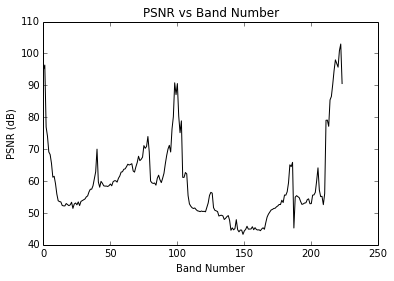

In [57]:
plt.figure(80)
plt.plot(range(224),psnr, 'k')
plt.xlabel('Band Number')
plt.ylabel('PSNR (dB)')
plt.title('PSNR vs Band Number')
plt.show()

In [58]:
print 'cr = ', cr
print 'bpp= ', bpp
print 'sdr= ', sdr
print 'psnr= ', psnr1
print 'dist= ',dist

cr =  24.991283732
bpp=  0.640223214286
sdr=  69.9013320299
psnr=  59.119317353
dist=  3.23834201233
